In [2]:
import tensorflow as tf
from tensorflow import keras


print(f"TensorFlow version: {tf.__version__}")

# Print Keras version
print(f"Keras version: {keras.__version__}")

TensorFlow version: 2.13.0


AttributeError: module 'keras.api._v2.keras' has no attribute '__version__'

In [4]:
import pandas as pd


wine_data = pd.read_csv("wine.csv")

# Explore dimensions
print(f"Dataset dimensions: {wine_data.shape}")
print(wine_data.head())


Dataset dimensions: (1599, 12)
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol quality  
0      9.4     bad  
1      9.8   

In [5]:
# Check for null values
print(wine_data.isnull().sum())

# Identify categorical variables
categorical_vars = ['quality']  # Assuming 'quality' is categorical

# Encode categorical variables
wine_data_encoded = pd.get_dummies(wine_data, columns=categorical_vars)

print(wine_data_encoded.head())


fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.2

In [8]:
# Separate features and target variable
X = wine_data_encoded.drop(columns=['quality_good'])
y = wine_data_encoded['quality_good']

print("Features shape:", X.shape)
print("Target shape:", y.shape)


Features shape: (1599, 12)
Target shape: (1599,)


In [9]:
from sklearn.model_selection import train_test_split

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Further split train data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

print("Train set:", X_train.shape, y_train.shape)
print("Validation set:", X_val.shape, y_val.shape)
print("Test set:", X_test.shape, y_test.shape)


Train set: (1023, 12) (1023,)
Validation set: (256, 12) (256,)
Test set: (320, 12) (320,)


In [10]:
from sklearn.preprocessing import StandardScaler

# Initialize StandardScaler
scaler = StandardScaler()

# Fit and transform the scaler on training data
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)


In [11]:
from tensorflow.keras.layers import Dense

# Create a Sequential model
model = keras.Sequential([
    Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')  # Binary output layer
])

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1664      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 9985 (39.00 KB)
Trainable params: 9985 (39.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [12]:
# Import TensorBoard callback
from tensorflow.keras.callbacks import TensorBoard

# Create TensorBoard callback
tensorboard_callback = TensorBoard(log_dir='./logs', histogram_freq=1)


In [13]:
# Import EarlyStopping callback
from tensorflow.keras.callbacks import EarlyStopping

# Create EarlyStopping callback
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)


In [14]:
# Import ModelCheckpoint callback
from tensorflow.keras.callbacks import ModelCheckpoint

# Create ModelCheckpoint callback
checkpoint_callback = ModelCheckpoint('best_model.h5', monitor='val_accuracy', save_best_only=True)


In [15]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1664      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 9985 (39.00 KB)
Trainable params: 9985 (39.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [16]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [17]:
# Fit the model with callbacks
history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=64, 
                    validation_data=(X_val_scaled, y_val), 
                    callbacks=[tensorboard_callback, early_stopping_callback, checkpoint_callback])


Epoch 1/50
16/16 [==============================] - 2s 36ms/step - loss: 0.5293 - accuracy: 0.8641 - val_loss: 0.3795 - val_accuracy: 0.9570
Epoch 2/50
 1/16 [>.............................] - ETA: 0s - loss: 0.3721 - accuracy: 0.9531

C:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


16/16 [==============================] - 0s 13ms/step - loss: 0.2572 - accuracy: 0.9863 - val_loss: 0.1772 - val_accuracy: 0.9844
Epoch 3/50
16/16 [==============================] - 0s 13ms/step - loss: 0.1050 - accuracy: 1.0000 - val_loss: 0.0688 - val_accuracy: 0.9961
Epoch 4/50
16/16 [==============================] - 0s 12ms/step - loss: 0.0385 - accuracy: 1.0000 - val_loss: 0.0290 - val_accuracy: 1.0000
Epoch 5/50
16/16 [==============================] - 0s 9ms/step - loss: 0.0168 - accuracy: 1.0000 - val_loss: 0.0152 - val_accuracy: 1.0000
Epoch 6/50
16/16 [==============================] - 0s 9ms/step - loss: 0.0095 - accuracy: 1.0000 - val_loss: 0.0098 - val_accuracy: 1.0000
Epoch 7/50
16/16 [==============================] - 0s 9ms/step - loss: 0.0063 - accuracy: 1.0000 - val_loss: 0.0071 - val_accuracy: 1.0000
Epoch 8/50
16/16 [==============================] - 0s 11ms/step - loss: 0.0045 - accuracy: 1.0000 - val_loss: 0.0054 - val_accuracy: 1.0000
Epoch 9/50
16/16 [=========

In [18]:
# Get the model's parameters
params = model.count_params()
print("Model parameters:", params)


Model parameters: 9985


In [19]:
# Convert training history to DataFrame
history_df = pd.DataFrame(history.history)
print(history_df.head())


       loss  accuracy  val_loss  val_accuracy
0  0.529276  0.864125  0.379537      0.957031
1  0.257205  0.986315  0.177229      0.984375
2  0.105018  1.000000  0.068812      0.996094
3  0.038455  1.000000  0.029042      1.000000
4  0.016848  1.000000  0.015197      1.000000


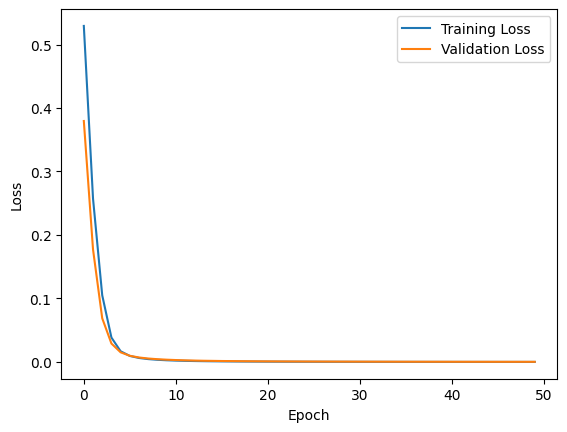

In [20]:
import matplotlib.pyplot as plt

# Plot training history
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [21]:
# Evaluate model on test data
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')


10/10 [==============================] - 0s 2ms/step - loss: 1.1530e-04 - accuracy: 1.0000
Test Loss: 0.00011530388292158023
Test Accuracy: 1.0
